In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uav-gps-spoof/spoofing-merged-gps-only.csv
/kaggle/input/uavjamming/jamming-merged-gps-only.csv


In [5]:
df=pd.read_csv('/kaggle/input/uavjamming/jamming-merged-gps-only.csv')

In [6]:
df.head()

,timestamp,q[0],q[1],q[2],q[3],delta_q_reset[0],delta_q_reset[1],delta_q_reset[2],delta_q_reset[3],quat_reset_counter,...,v_z_valid,xy_reset_counter,z_reset_counter,vxy_reset_counter,vz_reset_counter,heading_reset_counter,xy_global,z_global,dist_bottom_valid,label
0,332828103,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,...,1,2,0,2,1,3,1,1,1.0,benign
1,333003247,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,...,1,2,0,2,1,3,1,1,1.0,benign
2,333008246,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,...,1,2,0,2,1,3,1,1,1.0,benign
3,333013247,-0.278096,-0.004139,-0.002316,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,...,1,2,0,2,1,3,1,1,1.0,benign
4,333022041,-0.278098,-0.004136,-0.002315,0.960541,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,...,1,2,0,2,1,3,1,1,1.0,benign


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                6445 non-null   int64  
 1   q[0]                     6445 non-null   float64
 2   q[1]                     6445 non-null   float64
 3   q[2]                     6445 non-null   float64
 4   q[3]                     6445 non-null   float64
 5   delta_q_reset[0]         6445 non-null   float64
 6   delta_q_reset[1]         6445 non-null   float64
 7   delta_q_reset[2]         6445 non-null   float64
 8   delta_q_reset[3]         6445 non-null   float64
 9   quat_reset_counter       6445 non-null   int64  
 10  lat_x                    6445 non-null   float64
 11  lon_x                    6445 non-null   float64
 12  alt_x                    6445 non-null   float64
 13  alt_ellipsoid_x          6445 non-null   float64
 14  delta_alt               

In [8]:
df.label.value_counts()

label
benign       4985
malicious    1460
Name: count, dtype: int64

U**nbalnced data set**



In [9]:
df['label'].replace({'benign': 1, 'malicious':0 },inplace=True)
df['label'].value_counts()

/tmp/ipykernel_30/4206668623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace({'benign': 1, 'malicious':0 },inplace=True)
/tmp/ipykernel_30/4206668623.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'].replace({'benign': 1, 'malicious':0 },inplace=True)


label
1    4985
0    1460
Name: count, dtype: int64

/tmp/ipykernel_30/4191100140.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


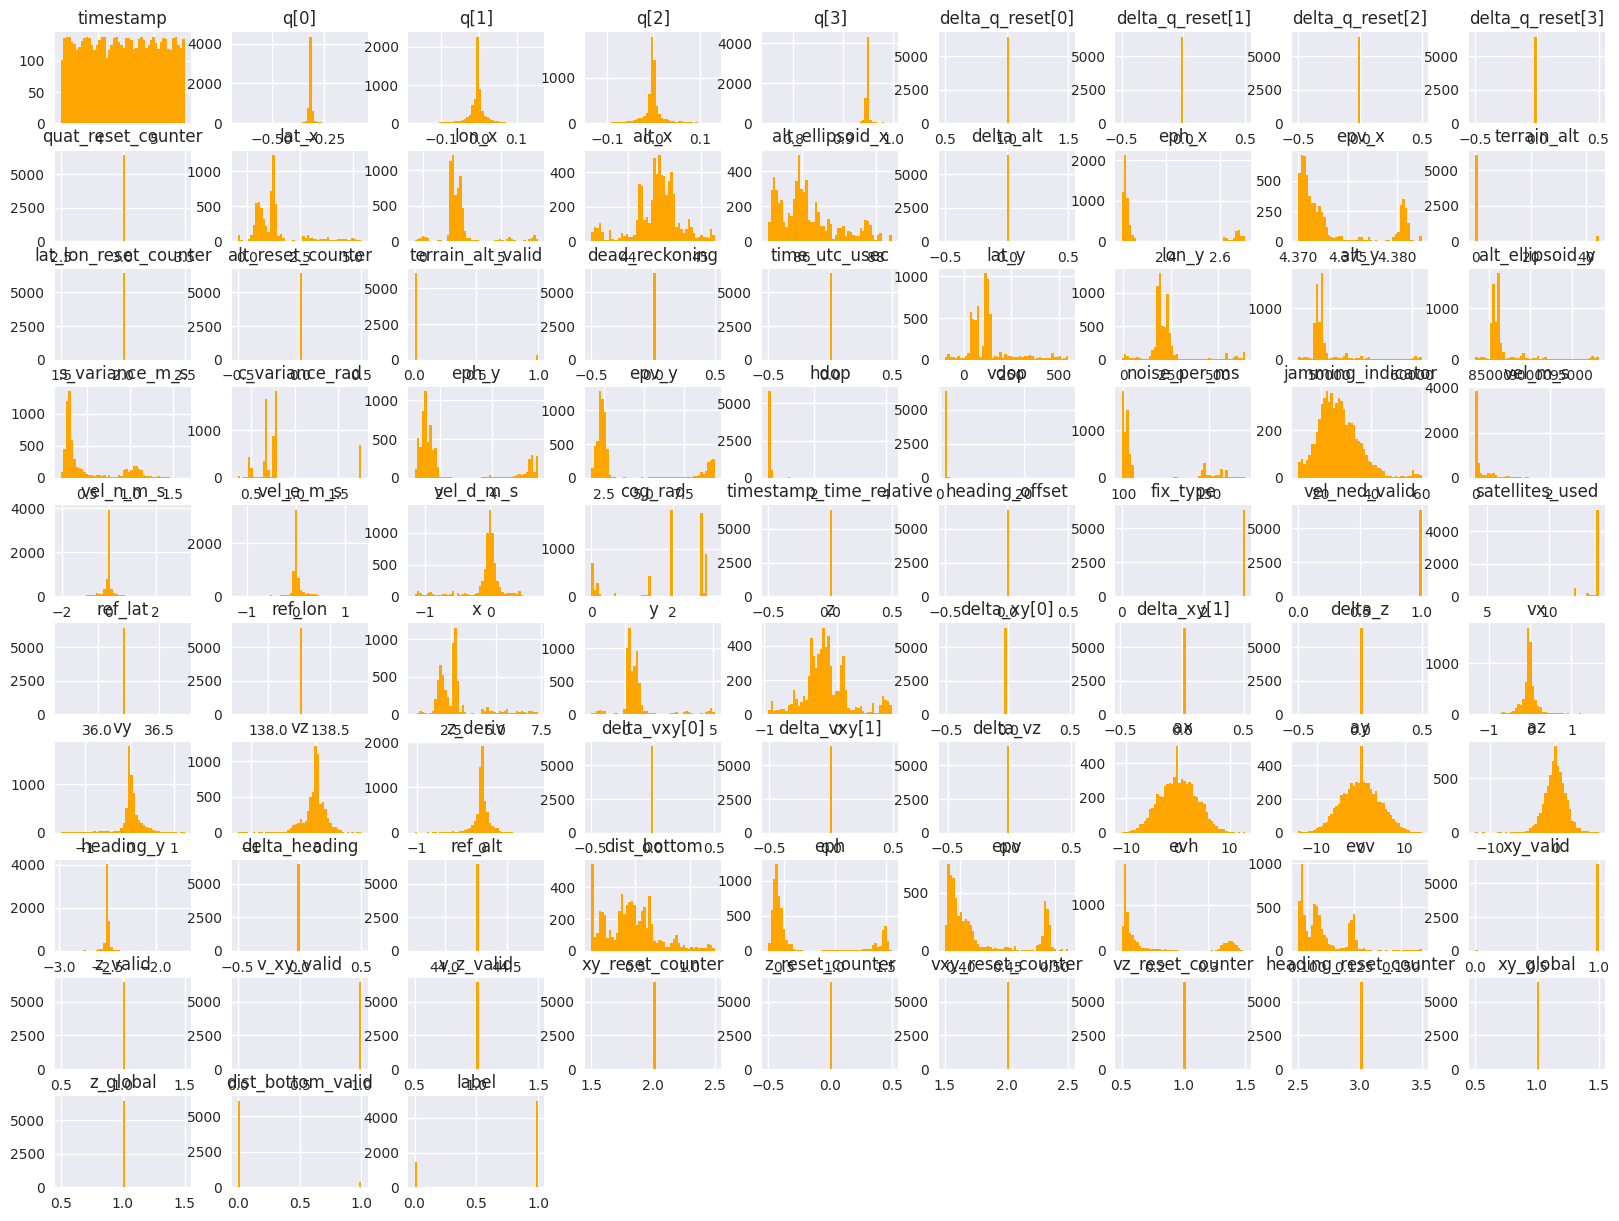

In [10]:
## Plot desnity plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [11]:
df.isnull().sum()

timestamp                0
q[0]                     0
q[1]                     0
q[2]                     0
q[3]                     0
                        ..
heading_reset_counter    0
xy_global                0
z_global                 0
dist_bottom_valid        0
label                    0
Length: 84, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                6445 non-null   int64  
 1   q[0]                     6445 non-null   float64
 2   q[1]                     6445 non-null   float64
 3   q[2]                     6445 non-null   float64
 4   q[3]                     6445 non-null   float64
 5   delta_q_reset[0]         6445 non-null   float64
 6   delta_q_reset[1]         6445 non-null   float64
 7   delta_q_reset[2]         6445 non-null   float64
 8   delta_q_reset[3]         6445 non-null   float64
 9   quat_reset_counter       6445 non-null   int64  
 10  lat_x                    6445 non-null   float64
 11  lon_x                    6445 non-null   float64
 12  alt_x                    6445 non-null   float64
 13  alt_ellipsoid_x          6445 non-null   float64
 14  delta_alt               

In [13]:
df.columns

Index(['timestamp', 'q[0]', 'q[1]', 'q[2]', 'q[3]', 'delta_q_reset[0]',
       'delta_q_reset[1]', 'delta_q_reset[2]', 'delta_q_reset[3]',
       'quat_reset_counter', 'lat_x', 'lon_x', 'alt_x', 'alt_ellipsoid_x',
       'delta_alt', 'eph_x', 'epv_x', 'terrain_alt', 'lat_lon_reset_counter',
       'alt_reset_counter', 'terrain_alt_valid', 'dead_reckoning',
       'time_utc_usec', 'lat_y', 'lon_y', 'alt_y', 'alt_ellipsoid_y',
       's_variance_m_s', 'c_variance_rad', 'eph_y', 'epv_y', 'hdop', 'vdop',
       'noise_per_ms', 'jamming_indicator', 'vel_m_s', 'vel_n_m_s',
       'vel_e_m_s', 'vel_d_m_s', 'cog_rad', 'timestamp_time_relative',
       'heading_offset', 'fix_type', 'vel_ned_valid', 'satellites_used',
       'ref_lat', 'ref_lon', 'x', 'y', 'z', 'delta_xy[0]', 'delta_xy[1]',
       'delta_z', 'vx', 'vy', 'vz', 'z_deriv', 'delta_vxy[0]', 'delta_vxy[1]',
       'delta_vz', 'ax', 'ay', 'az', 'heading_y', 'delta_heading', 'ref_alt',
       'dist_bottom', 'eph', 'epv', 'evh', 'evv', '

In [14]:
X = df.drop(['timestamp','label'],axis=1)
y = df.label



In [15]:
X.head()

,q[0],q[1],q[2],q[3],delta_q_reset[0],delta_q_reset[1],delta_q_reset[2],delta_q_reset[3],quat_reset_counter,lat_x,...,v_xy_valid,v_z_valid,xy_reset_counter,z_reset_counter,vxy_reset_counter,vz_reset_counter,heading_reset_counter,xy_global,z_global,dist_bottom_valid
0,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,36.204806,...,1.0,1,2,0,2,1,3,1,1,1.0
1,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,36.204806,...,1.0,1,2,0,2,1,3,1,1,1.0
2,-0.278094,-0.004139,-0.002317,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,36.204806,...,1.0,1,2,0,2,1,3,1,1,1.0
3,-0.278096,-0.004139,-0.002316,0.960542,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,36.204806,...,1.0,1,2,0,2,1,3,1,1,1.0
4,-0.278098,-0.004136,-0.002315,0.960541,0.999999,5.520000e-10,-4.980000e-10,0.001079,3,36.204806,...,1.0,1,2,0,2,1,3,1,1,1.0


In [16]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: label, dtype: int64,
 label
 1    4985
 0    1460
 Name: count, dtype: int64)

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2529,stratify=y)


In [18]:
X_train.shape

(4511, 82)

In [19]:
y_train.value_counts(),y_test.value_counts()

(label
 1    3489
 0    1022
 Name: count, dtype: int64,
 label
 1    1496
 0     438
 Name: count, dtype: int64)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Axes: >

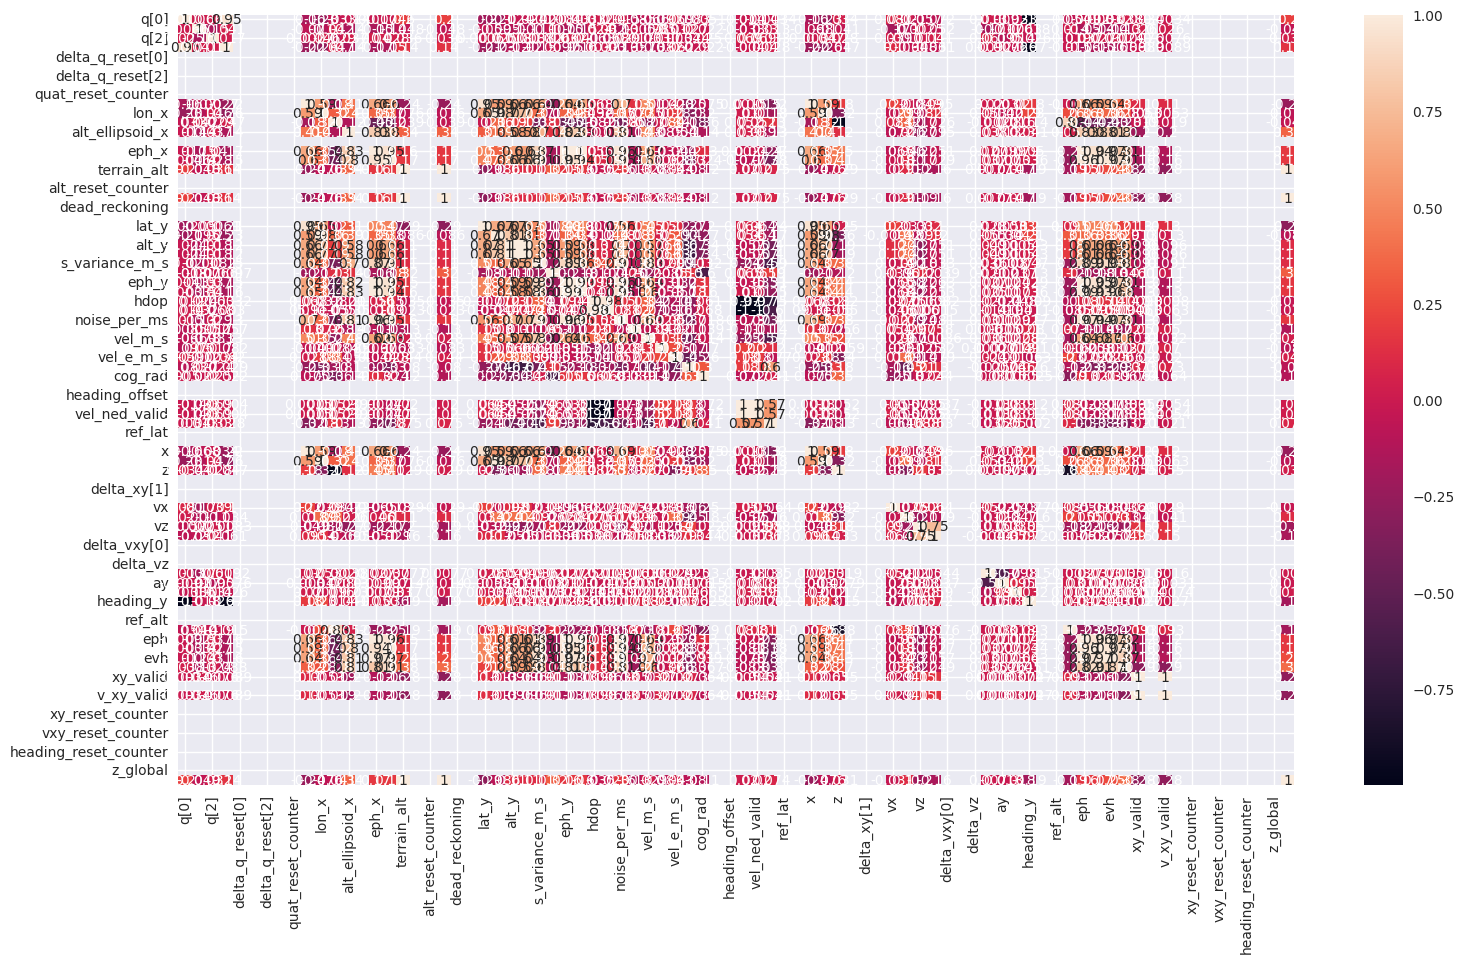

In [21]:
# Check for multicollinearity
plt.figure(figsize=(18,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
# threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [24]:
corr_features

{'alt_ellipsoid_y',
 'alt_y',
 'dist_bottom',
 'dist_bottom_valid',
 'eph',
 'eph_x',
 'eph_y',
 'epv',
 'epv_x',
 'epv_y',
 'evh',
 'evv',
 'fix_type',
 'heading_y',
 'lat_y',
 'lon_y',
 'noise_per_ms',
 'q[3]',
 's_variance_m_s',
 'satellites_used',
 'terrain_alt_valid',
 'v_xy_valid',
 'vdop',
 'vel_m_s',
 'vel_ned_valid',
 'x',
 'y',
 'z',
 'z_deriv'}

In [25]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((4511, 53), (1934, 53))

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

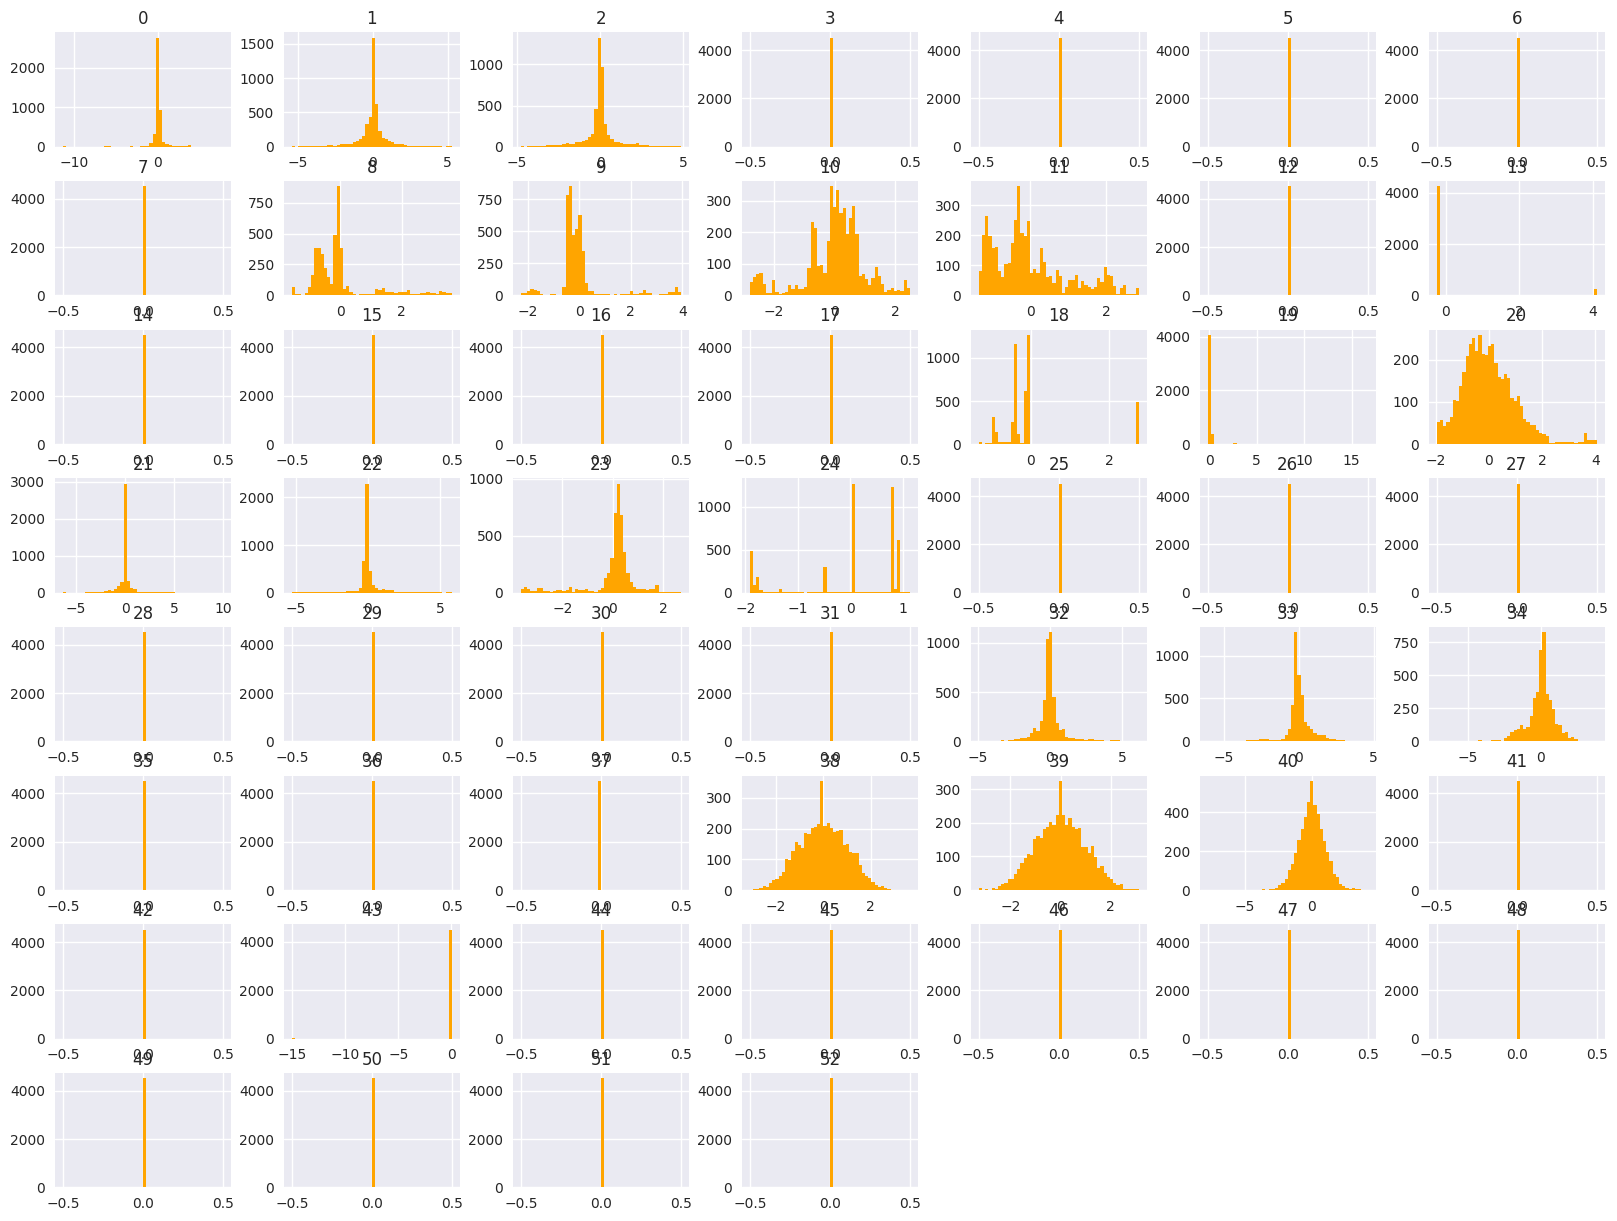

In [27]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

Text(0.5, 1.0, 'X_train After Scaling')

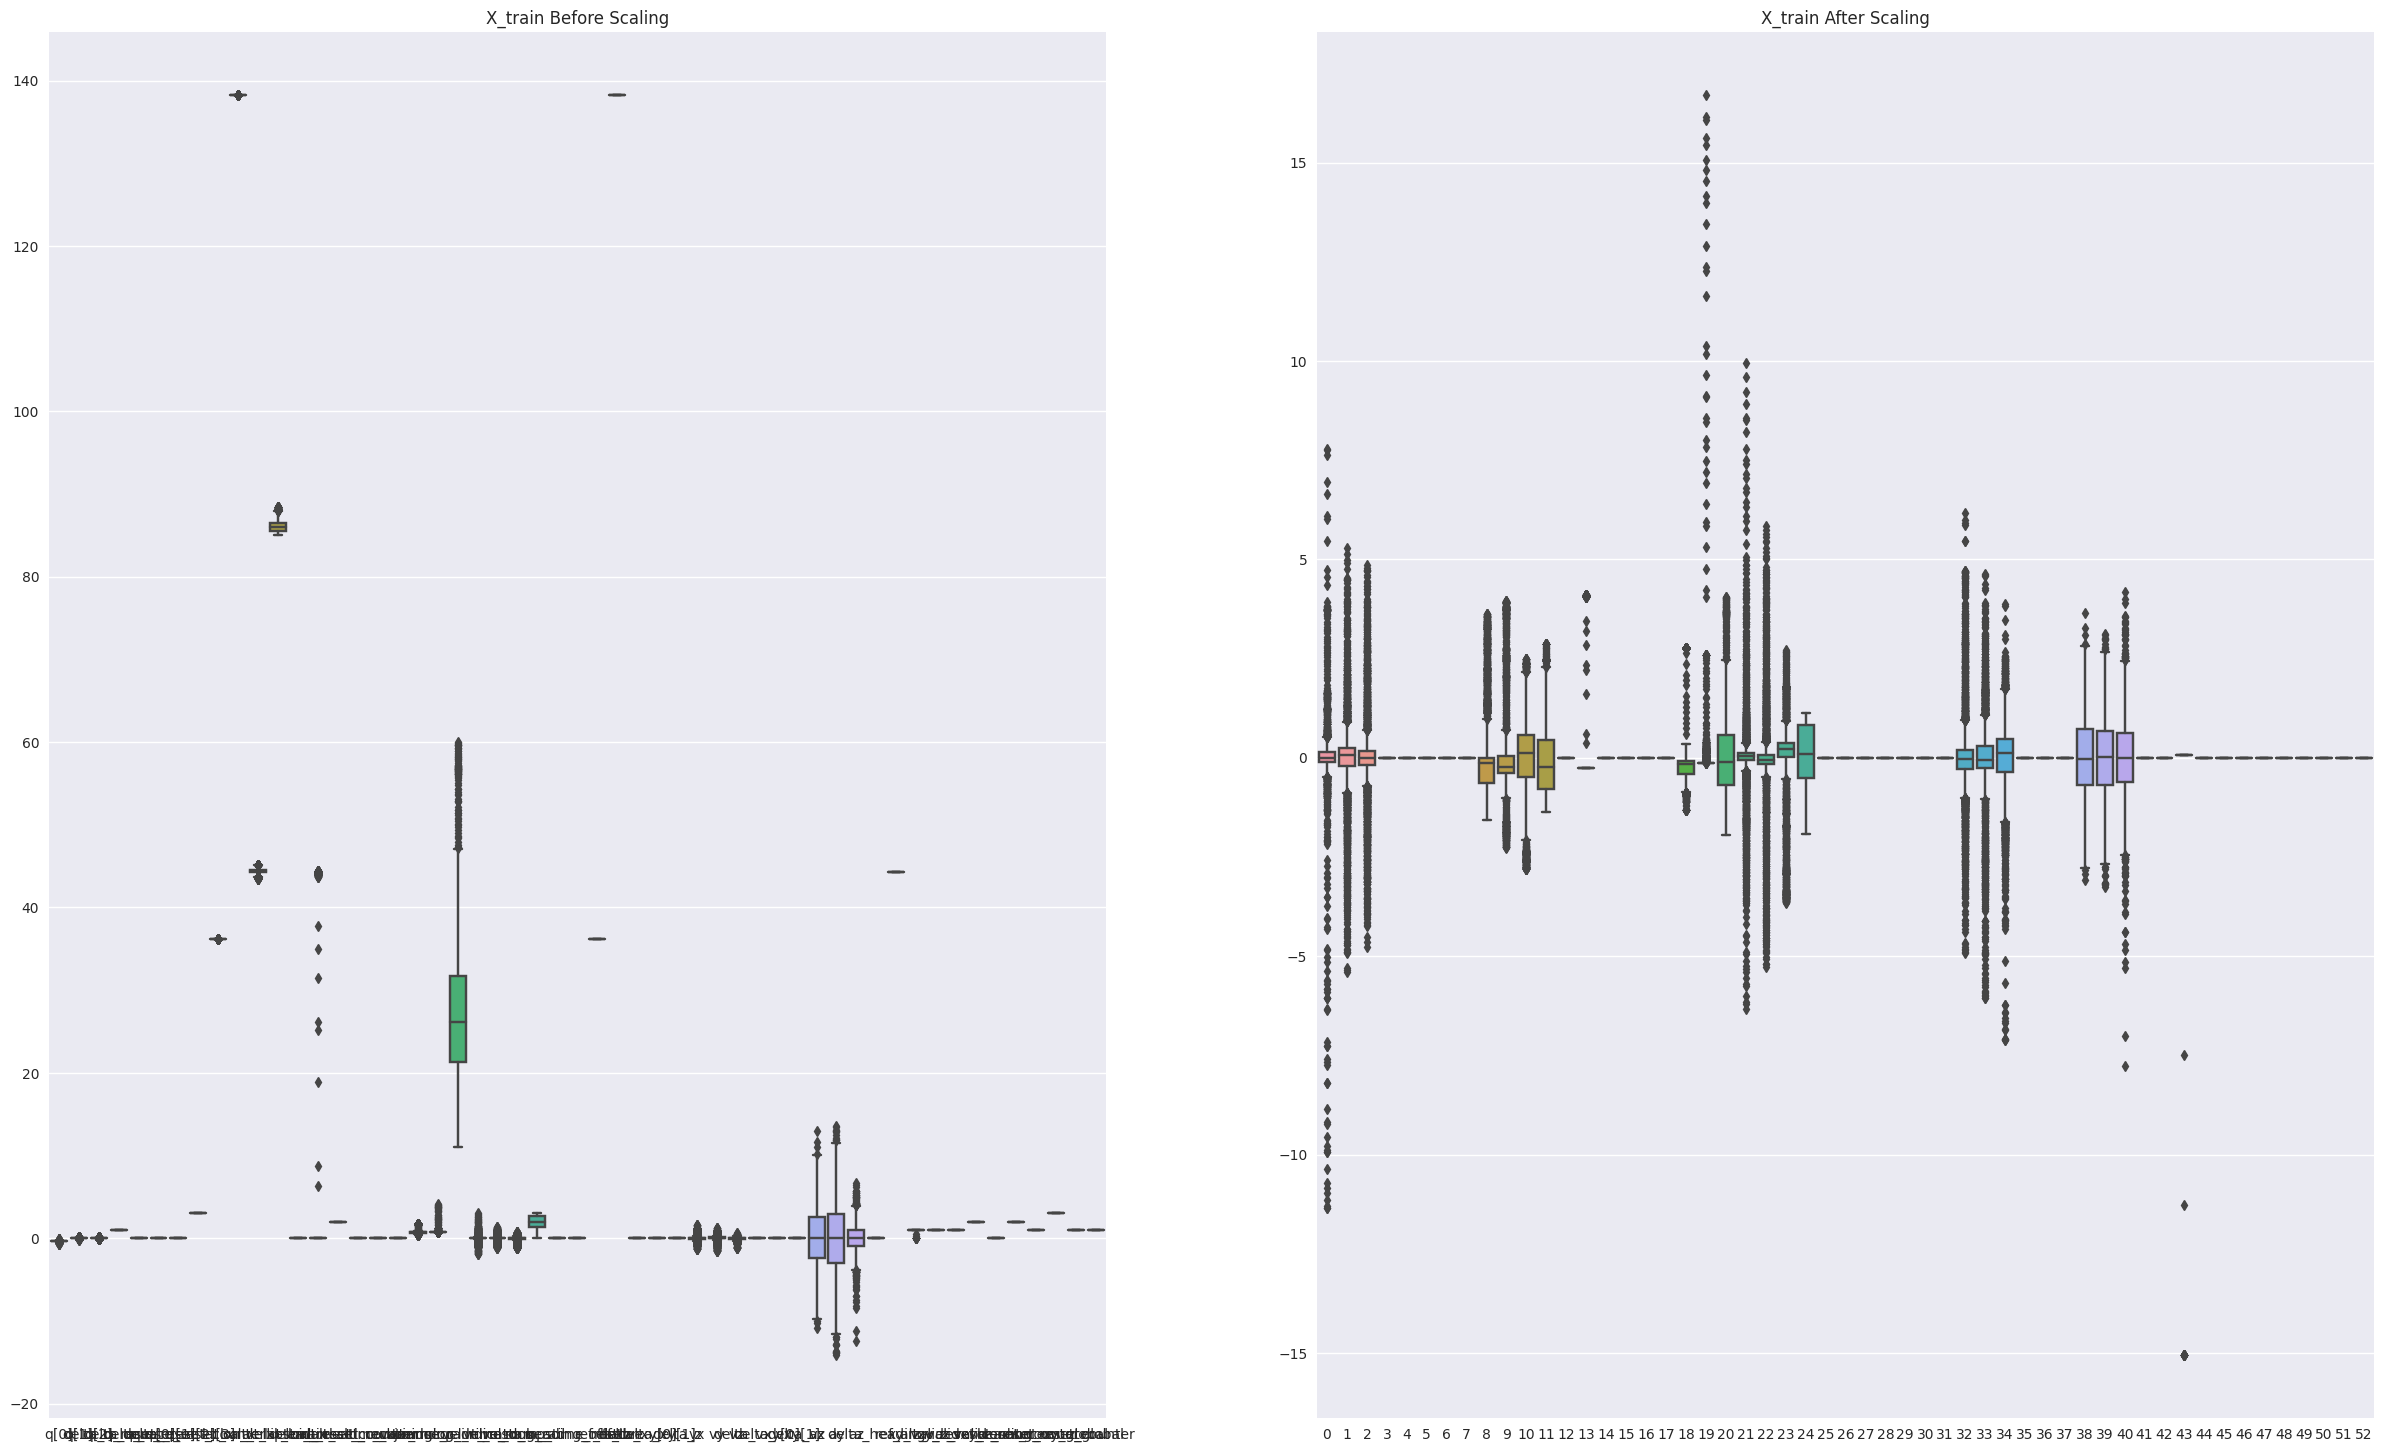

In [28]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,\
                            confusion_matrix

In [27]:
models={

    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Bernoulli":BernoulliNB(),
    "knn"    :KNeighborsClassifier(),

    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Gausian":GaussianNB(),
    
    "Random Forest":RandomForestClassifier(),
    # "svm"    :SVC() we can't use svm because of high computation
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)



      # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision, add average='weighted'
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall, add average='weighted'
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) #Calculate Roc, add multi_class='ovr'


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred) # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision, add average='weighted'
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall, add average='weighted'
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc, add multi_class='ovr'


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9997
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9990
- F1 score: 0.9993
- Precision: 1.0000
- Recall: 0.9987
- Roc Auc Score: 0.9993


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Bernoulli
Model performance for Training set
- Accuracy: 0.9570
- F1 score: 0.9724
- Precision: 0.9666
- Recall: 0.9782
- Roc Auc Score: 0.9314
----------------------------------
Model performance for Test set
- Accuracy: 0.9586
- F1 score: 0.9733
- Precision: 0.9726
- Recall: 0.9739
- Roc Auc Score: 0.9402


knn
Model performance for Training set
- Accuracy: 0

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,\
                            confusion_matrix

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
# multi_class='ovr', max_iter=100
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled) 
y_test_pred = model.predict(X_test_scaled)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934

[[ 438    0]
 [   2 1494]]


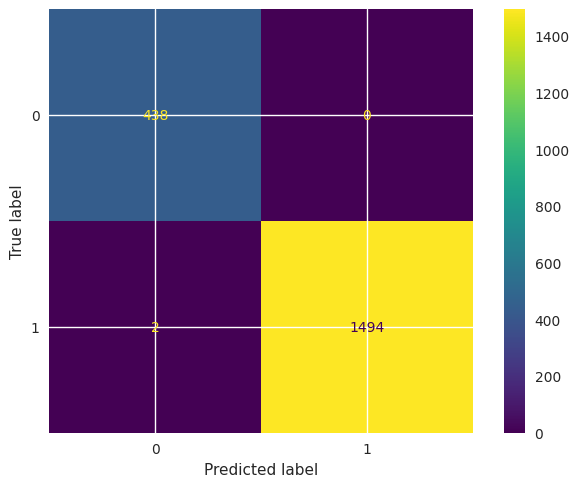

In [47]:
print("Logistic Regression")
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred,  labels=model.classes_))
cm=confusion_matrix(y_test,y_test_pred,  labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()



ROC AUC Score: 0.9990


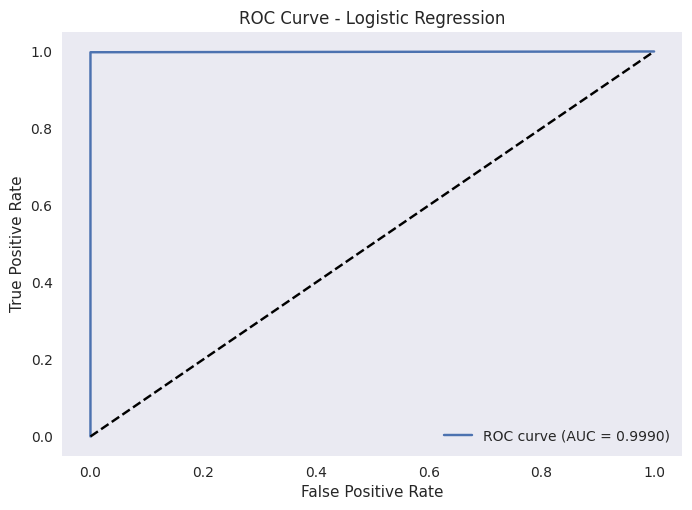

In [48]:
# ROC AUC Score and Curve (only for binary classification)
if len(dt.classes_) == 2:
    y_test_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Logistic Regression")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC AUC can only be calculated for binary classification.")

# KNN

In [49]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)# model training

# lr_pred = knn.predict(X_test_scaled)# testing

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934

[[ 438    0]
 [   2 1494]]


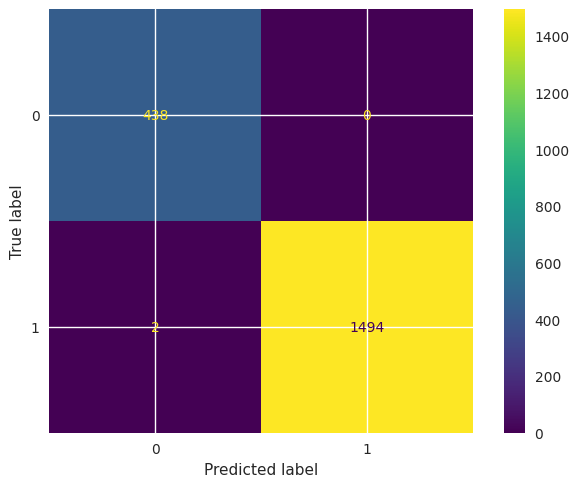

In [50]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred,  labels=knn.classes_))
cm=confusion_matrix(y_test,y_test_pred,  labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_).plot()

ROC AUC Score: 0.9990


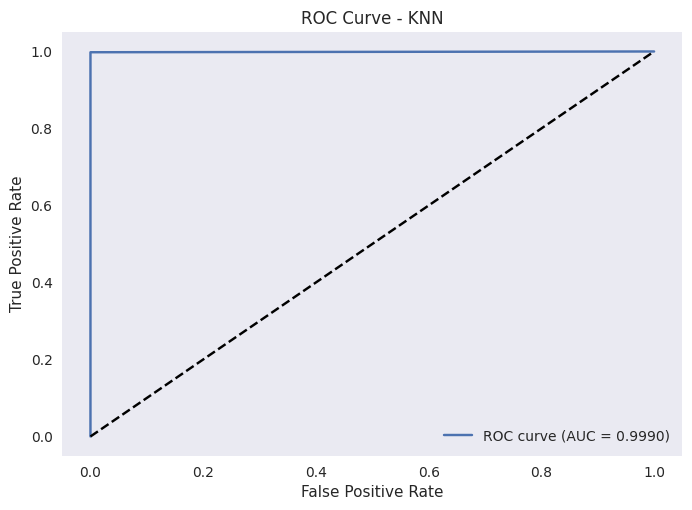

In [51]:
# ROC AUC Score and Curve (only for binary classification)
if len(dt.classes_) == 2:
    y_test_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - KNN")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC AUC can only be calculated for binary classification.")

# SVM

In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled,y_train)# model training

# lr_pred = svc.predict(X_test_scaled)# testing
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934

[[ 438    0]
 [   2 1494]]


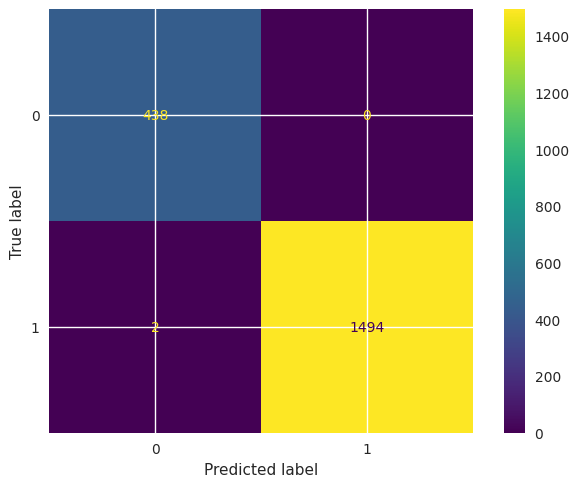

In [62]:
print('SVM')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred,  labels=svc.classes_))
cm=confusion_matrix(y_test,y_test_pred,  labels=svc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_).plot()

ROC AUC Score: 0.9990


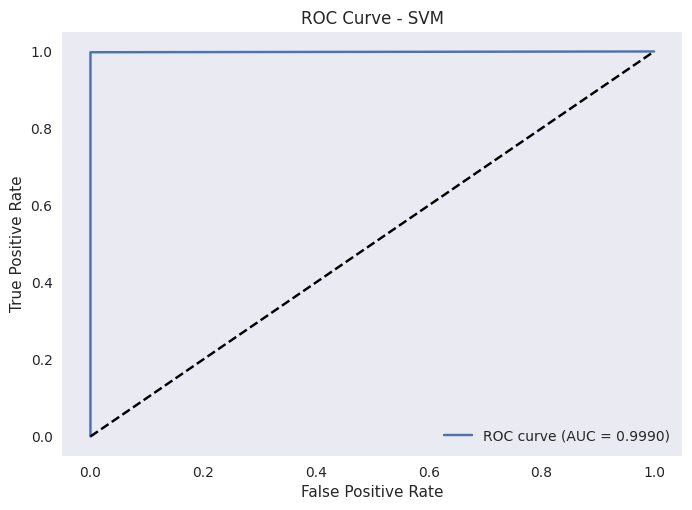

In [63]:
# ROC AUC Score and Curve (only for binary classification)
if len(dt.classes_) == 2:
    y_test_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - SVM")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC AUC can only be calculated for binary classification.")

# BernoulliNB

In [65]:
nb=BernoulliNB()
nb.fit(X_train_scaled,y_train)# model training

# lr_pred = nb.predict(X_test_scaled)# testing

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

NB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934

[[ 438    0]
 [   2 1494]]


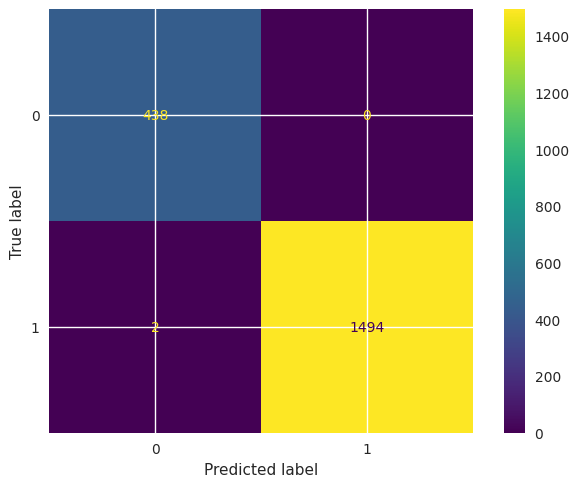

In [66]:
print('NB')
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred,  labels=nb.classes_))
cm=confusion_matrix(y_test,y_test_pred,  labels=nb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_).plot()

ROC AUC Score: 0.9990


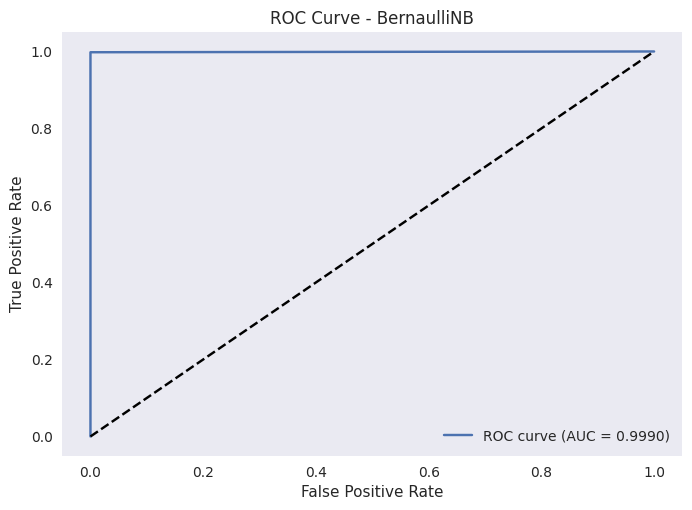

In [67]:
# ROC AUC Score and Curve (only for binary classification)
if len(dt.classes_) == 2:
    y_test_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - BernaulliNB")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC AUC can only be calculated for binary classification.")

# Decision Tree

In [59]:
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)# model training

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

Decision Tree 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      1934
   macro avg       1.00      1.00      1.00      1934
weighted avg       1.00      1.00      1.00      1934

[[ 438    0]
 [   2 1494]]


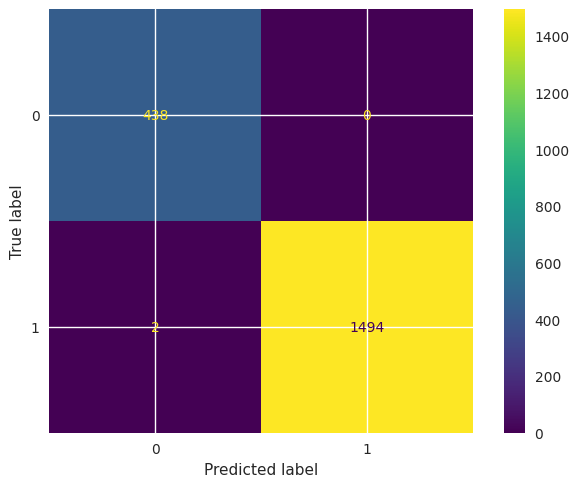

In [44]:
# lr_pred = dt.predict(X_test_scaled)# testing
print("Decision Tree \n")

print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred,  labels=dt.classes_))
cm=confusion_matrix(y_test,y_test_pred,  labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_).plot()

ROC AUC Score: 0.9990


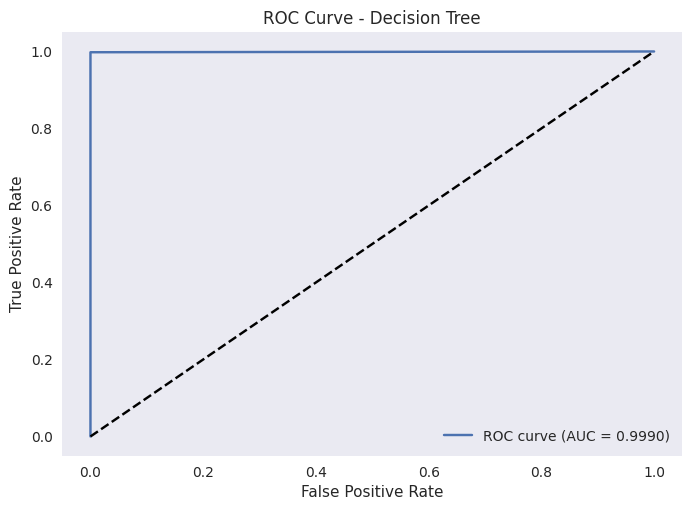

In [45]:
# ROC AUC Score and Curve (only for binary classification)
if len(dt.classes_) == 2:
    y_test_proba = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for class 1
    auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC AUC Score: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Decision Tree")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC AUC can only be calculated for binary classification.")